# Regression

## Cooks Distance

#### Cook’s distance is a measurement that uses both an observation’s leverage and its residual value. As the leverage is higher, its calculated Cook’s distance is higher. In general, a Cook’s distance value greater than 0.5 means a residual has leverage that is negatively impacting the model through over-representation – essentially, an outlier. Cook’s distance is included in the code and flags the residuals that have distances greater than 0.5. Cook’s distance is particularly useful because removing outliers may not have a significant impact on the model. However, if the outlier has a high Cook’s distance value, that is a strong indication that resolving the outlier will benefit the model. Cook’s distance is calculated for each data point by removing it from the model and calculating the difference in error divided by the mean squared error multiplied by the number of model coefficients plus one. 

## Leverage

#### Leverage is used to identify the distance of an individual point from all other points. High leverage for a residual likely means the corresponding data point is an outlier strongly influencing the model to fit less approximately to the overall data and instead give more weight to that specific value. Residuals should be between -2 and 2 to not be considered potential outliers. Values between +/-2.5 to 3 suggest data points are extreme outliers. Overall, this plot is useful for separating outliers that have no significant negative impact on the model from the ones that do.


## Handling serial correlation

#### If uncertain of the presence of serial correlation in the residuals, a useful next step is to analyze a Partial Autocorrelation Function (PACF) plot to assess whether serial correlation exists in the model at a significant level, which could explain issues with the model’s residuals.

## Homoscedasticity of the residuals

#### In the previous chapter, we also discussed homoscedasticity. For a well-fitted model, we expect that the residuals should exhibit homoscedasticity. 

## Multicollinearity

#### The new assumption for MLR is that there is little or no multicollinearity in the explanatory variables. Multicollinearity is a situation that occurs when two or more variables are strongly linearly correlated. We commonly use the variance inflation factor (VIF) to detect multicollinearity. The VIF is a measurement of how much the coefficient of an explanatory variable is influenced by other explanatory variables. A lower VIF is better where the minimum value is 1, meaning there is no correlation. We generally consider a VIF of 5 or more to be too high. When a high VIF is detected in a set of explanatory variables, we repeatedly remove the variable with the highest VIF until the VIF values for each variable are below 5. Let’s look at an example with our current data. The process of removing variables with high VIFs is shown in Figure 7.5.

In [2]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import statsmodels.api as sm
import pandas as pd
boston_housing = load_boston()
df_boston = pd.DataFrame(boston_housing.data, columns = boston_housing.feature_names)
df_boston['PRICE'] = boston_housing.target
df_boston = sm.add_constant(df_boston, prepend=False)


/Users/maukanmir/miniforge3/envs/machine-learning-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets in

In [3]:
X = df_boston.drop('PRICE', axis=1)
y = df_boston['PRICE']

In [4]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, shuffle=True)

In [6]:
ols_model = sm.OLS(y_train, X_train)
compiled_model = ols_model.fit()
compiled_model_ridge = ols_model.fit_regularized(method = 'elastic_net', L1_wt=0, alpha=0.1,refit=True)
print('OLS Error: ', MSE(y_train,
    compiled_model.predict(X_train)) )
print('Ridge Regression Error: ', MSE(y_train,
    compiled_model_ridge.predict(X_train)))

OLS Error:  521.6988967311429
Ridge Regression Error:  523.9197787600616


In [7]:
print('OLS Error: ', MSE(y_test, compiled_model.predict(X_test)) )
print('Ridge Regression Error: ', MSE(y_test, compiled_model_ridge.predict(X_test)))

OLS Error:  566.5050461246598
Ridge Regression Error:  552.8710655592686


In [8]:
ols_model = sm.OLS(y_train, X_train)
compiled_model = ols_model.fit()
compiled_model_lasso = ols_model.fit_regularized(method='elastic_net', L1_wt=1, alpha=0.1,refit=True)

In [9]:
print('OLS Error: ', MSE(y_train, compiled_model.predict(X_train)) )
print('LASSO Regression Error: ', MSE(y_train, compiled_model_lasso.predict(X_train)))

OLS Error:  521.6988967311429
LASSO Regression Error:  522.0443049131071


In [10]:
print('OLS Error: ', MSE(y_test, compiled_model.predict(X_test)) )
print('LASSO Regression Error: ', MSE(y_test, compiled_model_lasso.predict(X_test)))

OLS Error:  566.5050461246598
LASSO Regression Error:  564.5502674639628


In [12]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
#location of dataset
url = "/Users/maukanmir/Downloads/Hitters.csv"
#read in data
data = pd.read_csv(url).dropna() # to simply the analysis, we drop all missing values
# create dummies variables
dummies_variables = pd.get_dummies(data[['League', 'Division', 'NewLeague']])
# create features and target
target = data['Salary']
feature_to_drop = data.drop(['Salary', 'League', 'Division', 'NewLeague'],axis=1).astype('float64')
X = pd.concat([feature_to_drop, dummies_variables[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
#scaled data - preprocessing
X_scaled = scale(X)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

In [13]:
# First generate all the principal components
pca = PCA()
X_pc_train = pca.fit_transform(X_train)
X_pc_train.shape

(210, 19)

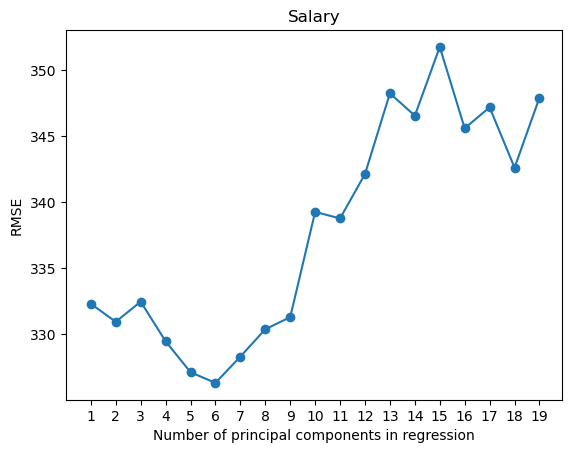

In [14]:
# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)
model = LinearRegression()
rmse_score = []
# Calculate MSE score - based on 19 PCs
for i in range(1, X_pc_train.shape[1]+1):
    rmse = -cross_val_score(model, X_pc_train[:,:i], y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
    rmse_score.append(rmse)
# Plot results
plt.plot(rmse_score, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Salary')
plt.xlim(xmin=-1)
plt.xticks(np.arange(X_pc_train.shape[1]), np.arange(1, X_pc_train.shape[1]+1))
plt.show()


In [15]:
# Train regression model on training data
model = LinearRegression()
model.fit(X_pc_train[:,:6], y_train)
pcr_score_train = -cross_val_score(model, X_pc_train[:,:6], y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
# Prediction with test data
X_pc_test = pca.fit_transform(X_test)[:,:6]
pred = model.predict(X_pc_test)
pcr_score_test = mean_squared_error(y_test, pred, squared=False)